In [1]:
from lbmpy.session import *
from lbmpy.phasefield.experiments2D import *
from lbmpy.phasefield.post_processing import *

# Liquid lens setup - 3 phase model

rudimentary test for liquid lens setup - angles are not yet validated with Neumann relation

In [2]:
sc = liquid_lens_setup(domain_size=(150, 75), optimization={'target': 'cpu', 'openmp': 2}, 
                       kappas=(0.01, 0.02, 0.001), cahn_hilliard_relaxation_rates=[np.nan, 1, 3/2])

In [3]:
#for i in range(10000):
#    sc.run(20_000)
#    phi = sc.concentration[:, :].copy()
#    tps = get_triple_points(phi, phase_indices=[0,1,2], contour_line_eps=0.01, threshold=5.5)
#    print(tps[0].angles)

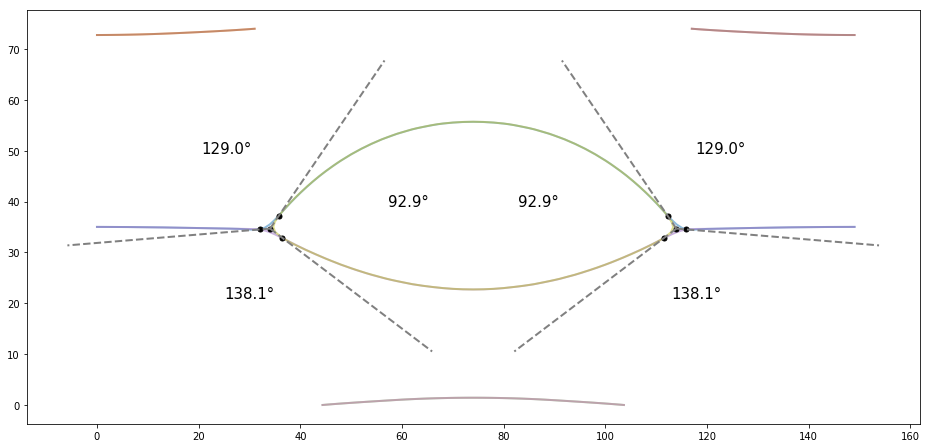

In [4]:
sc.run(5000)

plt.figure(figsize=(16, 8))
phi = sc.concentration[:, :].copy()
plot_contour_lines(phi, alpha=0.5)
tps = get_triple_points(phi, phase_indices=[0,1,2], contour_line_eps=0.009, threshold=1.5)
plot_triple_points(tps, line_length=40)

assert len(tps) == 2
for tp in tps:
    np.testing.assert_allclose(sum(tp.angles), 360.0)

In [5]:
analytic_neumann_angles([0.01, 0.02, 0.001])

# Liquid lens setup - n phase model

In [6]:
sc = create_two_drops_between_phases(domain_size=(200, 75))

In [7]:
sc.run(1000)

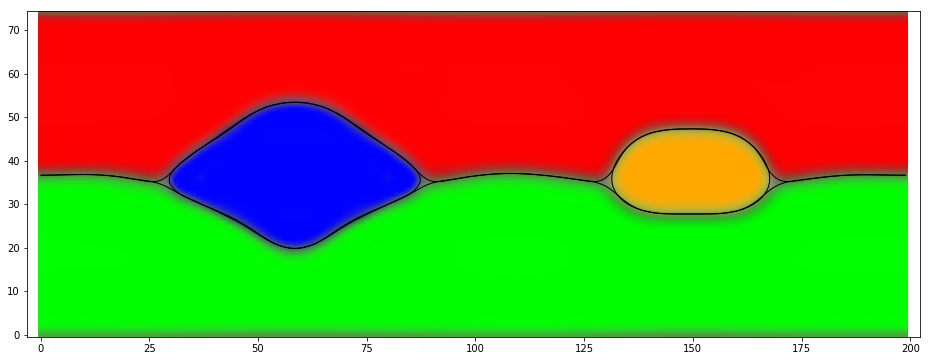

In [8]:
plt.phase_plot_for_step(sc)

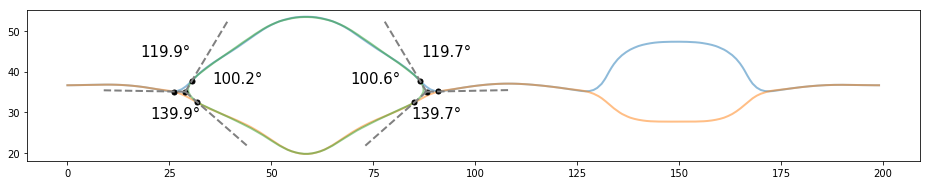

In [9]:
plt.figure(figsize=(16, 8))
phi = sc.concentration[:, :].copy()
plot_contour_lines(phi, alpha=0.5)
tps = get_triple_points(phi, phase_indices=[0,1,2], contour_line_eps=0.01, threshold=2.5)
plot_triple_points(tps, line_length=20)

assert len(tps) == 2
for tp in tps:
    np.testing.assert_allclose(sum(tp.angles), 360.0)